<img src="https://bengali.ai/wp-content/themes/openbangla/img/bengali.ai_logo_bluehue.jpg" title = "Bengali.Ai" />

# Working with Image

There is few packages in python world for working with images.
1. OpenCV
2. Pillow(PIL)
3. skimage
4. SimpleCV

We will be using <a href="https://pillow.readthedocs.io/en/stable/handbook/index.html">Pillow(PIL)</a> package form image importing, resizing, writing and etc. It comes up installed with anaconda and have a great deal in working with Pytorch(Deep Learning Library).

###  Into Image

In [1]:
from PIL import Image
image_path = './dataTemp/IUB1/'   
image = Image.open(image_path + '1.png') #reads or imports image

"./" or "../" This is relative way to give file path. 
<a href="<https://superuser.com/questions/153165/what-does-represent-while-giving-path">more</a>

In [2]:
image.size

(236, 136)

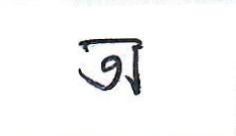

In [3]:
from IPython.display import display 
display(image)

We will use matplotlib package for plotting, which will be covered in future chapter. You can also use PIL's Image.show() method(Why it's called method?), but this opens a new window for showing image.

In [4]:
image.show()

In [5]:
image = image.resize((224, 224), Image.ANTIALIAS) #Image.ANTIALIAS is the interpolaton method, you don't need to worry about that unless you are Jeff.
image.size

(224, 224)

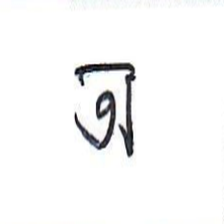

In [6]:
display(image)

May be we don't want to change aspect ratio of the image in resizing. You can resize image keeping aspect ratio same by Image.thumbnail() method.

In [7]:
size = 128, 128
image.thumbnail(size, Image.ANTIALIAS)
image.size

(128, 128)

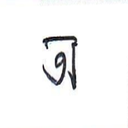

In [8]:
display(image)

You can also save image using Image.save() method

In [9]:
image.save(image_path + 'dump/1_resized.png')

### Image Channel

A channel in this context is the grayscale image of the same size as a color image, made of just one of these primary colors. For instance, an image from a standard digital camera will have a red, green and blue channel. A grayscale image has just one channel. 
<br> 
<br> So, an RGB image will be an array of this shape (h, w, 3), where three is for three channel(R G B)
<br> & an Grayscale image will be an array of this shape(h, w, 1) or (h, w). 
<a href="https://en.wikipedia.org/wiki/Channel_(digital_image)">more about channels</a>

In [10]:
image = Image.open(image_path + '1.png') #reads or imports image
image.mode

'RGB'

So it was imported as a RGB image. You can change it to grayscale format by using Image.convert('L') method. Why rgb is ever needed in this grapheme image? Isn't it itself a grayscale image?

In [11]:
image = image.convert('L')
image.mode

'L'

In [12]:
len(image.split()) #shows channel no

1

In [13]:
image = image.convert('RGB')
image.mode

'RGB'

In [14]:
len(image.split()) #shows channel no

3

### Get Directory Files Name

Couple of packages came into mind
1. glob
2. os

We can use using any of these based on application.

In [15]:
import os
fileNames = os.listdir(image_path)
fileNames

['1.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 'dump']

Here we don't need dump file. We just need .png files. We can achieve that by using unix shell type wildcards.

In [16]:
import glob
fileNames = glob.glob(image_path + '*.png') #asterisk here is a wildcard character
fileNames

['./dataTemp/IUB1/1.png',
 './dataTemp/IUB1/10.png',
 './dataTemp/IUB1/11.png',
 './dataTemp/IUB1/12.png',
 './dataTemp/IUB1/13.png',
 './dataTemp/IUB1/14.png',
 './dataTemp/IUB1/15.png',
 './dataTemp/IUB1/16.png',
 './dataTemp/IUB1/2.png',
 './dataTemp/IUB1/3.png',
 './dataTemp/IUB1/4.png',
 './dataTemp/IUB1/5.png',
 './dataTemp/IUB1/6.png',
 './dataTemp/IUB1/7.png',
 './dataTemp/IUB1/8.png',
 './dataTemp/IUB1/9.png']

### Reading bulk data

In [40]:
import numpy as np
bulkImage = []
for file in fileNames:  # iterate across list type fileNames, You can do importing, right?
    image = Image.open(file)
    image = image.resize((224, 224), Image.ANTIALIAS)
    image = np.asarray(image)
    image = image.reshape(3, 224, 224)
    bulkImage.append(image)
bulkImage = np.asarray(bulkImage)
bulkImage.shape

(16, 3, 224, 224)

There is lot's of other stuffs in PIL. Google it with specific annotation.

### Numpy intro

In python there is no array data type. So numpy package is used for array or matrix type modification.

In [18]:
import numpy as np
imageArray = np.array(image)
imageArray.shape #not size, numpy.size shows total length

(136, 236, 3)

In [19]:
imageArray

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [252, 252, 252],
        [251, 251, 251],
        [244, 244, 244]],

       [[253, 253, 253],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [250, 250, 250],
        [252, 252, 252],
        [245, 245, 245]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [247, 247, 247],
        [249, 249, 249],
        [252, 252, 252]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [251, 251, 251],
        [238, 238, 238]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [249, 249, 249],
        [248, 248, 248]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [248, 248, 248],
        [250, 250, 250]]

There is a wonderful notebook regarding numpy basics, try <a href="https://github.com/mingrammer/cs231n-numpy-tutorial/blob/master/numpy_tutorial.ipynb">this one out</a>.

# Practice Problem 1

### Data Normalization

Before running any DL model, data normalization is one of the preprocessing that has to be done. For data normalization couple of things will be done -
<br>
1. data array elements is kept between [0 1] or [-1 1] range. If you are reading image in uint8 then whole dataset have to be divided by 255.
2. mean of whole dataset minused.
3. divided by standard deviation of whole dataset.
<br> I know it sounds heavy, but <a href="https://www.youtube.com/watch?v=FMbl1ntpIXQ">it's so easy</a>.

#### Work

1. Read all graphemes from IUB2(RGB mode) in single n dimensional numpy array (ndarray)
2. Resize them to (128, 128) so that you can feed them to your DL model.
3. Normalize them.
<br> INPUT : _IUB2_ : dataset of 16 image
<br> OUTPUT : _imageNormalized_ : imageNormalized named a single array of shape (16, 128, 128, 3)

<img src="https://media.giphy.com/media/l378BzHA5FwWFXVSg/giphy.gif" alt="" title="wubba lubba dub dub" />